# Testing Notebook
### This notebook contains the functions to calculate the performance measure of the algorithms

In [1]:
#Importing required libraries
from training import preprocessing, supervised_method, unsupervised_method
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [2]:
#Reading the dataset
df=pd.read_csv('forestfires.csv')

In [3]:
#Function to print performance measures
def performanceMeasures(model):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f}%'.format(abs(score*100)))
    print('RMSE: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

# Testing linear regression model

In [4]:
X, y = preprocessing(df, task="regression")

In [5]:
linear_regression = supervised_method(X, y, task="regression")
performanceMeasures(linear_regression)

Accuracy: 41.38%
RMSE: 1.65


# Testing logistic regression model

In [6]:
X, y = preprocessing(df, task="classification")

In [7]:
logistic_regression = supervised_method(X, y, task="classification")
performanceMeasures(logistic_regression)

Accuracy: 50.00%
RMSE: 0.71


# Clustering

In [8]:
X, y = preprocessing(df, task="clustering")

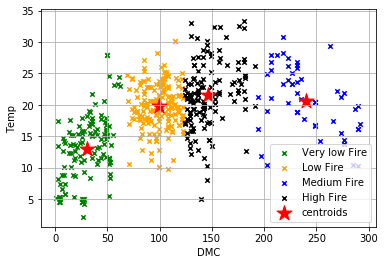

In [9]:
km = unsupervised_method(X)

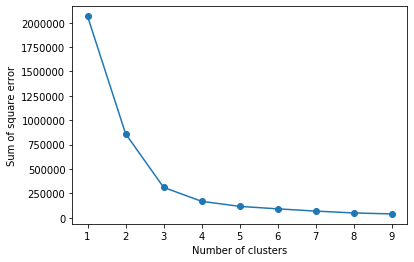

In [10]:
#Performance measure for clustering
k_rng=range(1,10)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    sse.append(km.inertia_)
plt.plot(k_rng, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of square error')
plt.show()